In [5]:
import gym
from rdkit import Chem
#from Reward import Reward
import numpy as np
import random 
import sys, os
from env_utils import ATOM_VOCAB, FRAG_VOCAB, BOND_VOCAB
from torch_geometric.data import Data


class ligEnv(gym.Env):
    
    def __init__(self, molecule, target_pdbdf):
        
        self.initial_mol = molecule
        self.mol = molecule
        self.target = target_pdbdf
        self.counter = 0
        
        #Pull vocabs in 
        self.possible_atom_types = np.array(ATOM_VOCAB)
        self.possible_motif_types = np.array(FRAG_VOCAB)
        self.possible_bond_types = np.array(BOND_VOCAB)
        
        #Define action space
        self.action_space = Discrete(len(FRAG_VOCAB))
        
        
    def step(self, action):
        pass
    
        #Attach fragment to mol
    
        #Calculate reward
        r = reward()
    
        self.counter += 1
        #return self.state, reward, done, info
    
    def reward(self):
        return 1
        #return Reward(self.mol, self.target_pdbdf).reward()
    
    def get_observation(self):
        
        #load in hotspot representation
        
        #representation of ligand in map (graph rep with coordinates?)
        
        pass
    
    def add_motif():
        #Attach fragment to molecule
        pass
        
    def pick_conformation():
        #Determine conformation of ligand to be applied to observation
        pass
    
    def seed(self, seed):
        #Set all random seeds
        np.random.seed(seed=seed)
        random.seed(seed)
        
    def render(self):
        return    
        
    def reset(self):
        
        #reinitialize variables
        self.mol = self.initial_mol
        self.counter = 0
        
        #reinit observation
        #return ob
        pass
    
    def molecule_graph(mol):
        
        atom_len = len(self.ATOM_VOCAB) + 1 #1 for unknown 
        bond_len = len(self.BOND_VOCAB) + 1 
    
        n_atoms = mol.GetNumAtoms()
        n_edges = mol.GetNumBonds()
        n_node_features = atom_len + 3 #atom identity and coodinates
        n_edge_features = bond_len + 2 #bond identity, conj and ring

        #Create edge index and features matrices
        edge_index = np.zeros((n_atoms, n_atoms)) 
        edge_features = np.zeros((n_edges, n_edge_features))
        for i, b in enumerate(mol.GetBonds()): 

            #Get bond info
            begin_idx = b.GetBeginAtomIdx()
            end_idx = b.GetEndAtomIdx()
            bond_type = b.GetBondType()

            #Assign egde
            edge_index[begin_idx,end_idx] = 1

            #One hot encode bond type
            f = np.zeros(bond_len)
            if bond_type in self.BOND_VOCAB: f[self.BOND_VOCAB.index(atom_symbol)] = 1
            else: f[-1] = 1
            #Add other features
            f= np.append(f, [int(b.GetIsConjugated()), int(b.IsInRing())])
            #Add to collection
            edge_features[i] = f


        #Create node feature matrix
        node_features = np.zeros((n_atoms, n_node_features))
        for i, a in enumerate(mol.GetAtoms()):

            #Get atom info
            atom_idx = a.GetIdx()
            atom_symbol = a.GetSymbol()
            x,y,z = mol.GetConformer().GetAtomPosition(atom_idx)

            #One hot encode atom type
            f = np.zeros(atom_len)
            if atom_symbol in self.ATOM_VOCAB: f[self.ATOM_VOCAB.index(atom_symbol)] = 1
            else: f[-1] = 1
            #Add coordinates to feature vector
            f = np.append(f, [x,y,z])
            #Add to collection
            node_features[i] = f

        return Data(x=node_features, edge_index=edge_index, edge_attr=edge_features)
    
if __name__ == "__main__":
    m = Chem.MolFromSmiles('Cc1ccccc1')
    m = ligEnv()

ModuleNotFoundError: No module named 'sascorer'

In [45]:
from rdkit import Chem
from rdkit.Chem import AllChem
# if it's not a method of a Chem instance, it might be a Chem class method, if not it is in AllChem.
# You just try until you find it.
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules in Jupyter
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults
from IPython import display



rxns=[]
dummy1 = Chem.MolFromSmiles('CCC(CCc1ccccc1)c2ccc(CCN)cc2')
dummy2 = Chem.MolFromSmiles('CC(=O)')
rxn = AllChem.ReactionFromSmarts('[#6;!$([#6](-C=O)-C=O):4]-[CH0:1](=[OD1])-[C;H1&!$(C-[*;!#6])&!$(C-C(=O)O),H2:2]-[CH0;R0:3](=[OD1])-[#6;!$([#6](-C=O)-C=O):5]>>[c:1]1(-[#6:4]):[c:2]:[c:3](-[#6:5]):n:c(-O):c(-C#N):1')
prods = rxn.RunReactants((dummy1,dummy2))
prods[0][0]




ValueError: ChemicalParserException: Number of reactants provided does not match number of reactant templates.

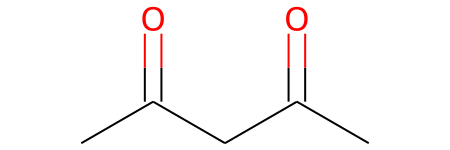

In [22]:
dummy1

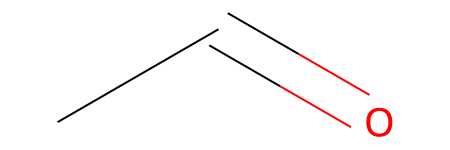

In [15]:
dummy2

In [16]:
import pandas as pd
df=pd.read_csv("ci200379p_si_003.csv")

In [23]:
df

,name,smirks,educt1_smiles,educt2_smiles
0,{Pictet-Spengler},[cH1:1]1:[c:2](-[CH2:7]-[CH2:8]-[NH2:9]):[c:3]...,c1cc(CCN)ccc1,CC(=O)
1,{benzimidazole_derivatives_carboxylic-acid/ester},[c;r6:1](-[NH1;$(N-[#6]):2]):[c;r6:3](-[NH2:4]...,c1c(NC)c(N)ccc1,CC(=O)O
2,{benzimidazole_derivatives_aldehyde},[c;r6:1](-[NH1;$(N-[#6]):2]):[c;r6:3](-[NH2:4]...,c1c(NC)c(N)ccc1,CC(=O)
3,{benzothiazole},[c;r6:1](-[SH1:2]):[c;r6:3](-[NH2:4]).[#6:6]-[...,c1c(S)c(N)ccc1,CC(=O)
4,{benzoxazole_arom-aldehyde},[c:1](-[OH1;$(Oc1ccccc1):2]):[c;r6:3](-[NH2:4]...,c1cc(O)c(N)cc1,c1ccccc1C(=O)
5,{benzoxazole_carboxylic-acid},[c;r6:1](-[OH1:2]):[c;r6:3](-[NH2:4]).[#6:6]-[...,c1cc(O)c(N)cc1,CC(=O)O
6,{thiazole},[#6:6]-[C;R0:1](=[OD1])-[CH1;R0:5](-[#6:7])-[*...,CC(=O)C(I)C,NC(=S)C
7,{Niementowski_quinazoline},[c:1](-[C;$(C-c1ccccc1):2](=[OD1:3])-[OH1]):[c...,c1c(C(=O)O)c(N)ccc1,C(=O)N
8,{tetrazole_terminal},[CH0;$(C-[#6]):1]#[NH0:2]>>[C:1]1=[N:2]-N-N=N-1,CC#N,NaN
9,{tetrazole_connect_regioisomere_1},[CH0;$(C-[#6]):1]#[NH0:2].[C;A;!$(C=O):3]-[*;#...,CC#N,CBr


In [24]:
df = df[df['educt2_smiles'].notna()]

In [27]:
rxns_list=df['smirks'].tolist()

In [28]:
rxns_list_indexed={b: a for a, b in enumerate(set(rxns_list))}

In [32]:
rxns_list_indexed
inv_map = {v: k for k, v in rxns_list_indexed.items()}

In [34]:
len(inv_map)

56

In [ ]:
import sys
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

df=pd.read_csv("ci200379p_si_003.csv")

# remove reactions like those involving alkynes (we are likely not to see those in our fragment library)
df = df[df['educt2_smiles'].notna()]

# get all possible rxns
rxns_list=df['smirks'].tolist()

# get indexed reactions in a dictionary format
rxns_list_indexed={b: a for a, b in enumerate(set(rxns_list))}

# we have 56 reactions total - (ex: mapped_rxns[0])
mapped_rxns = {v: k for k, v in rxns_list_indexed.items()}


def rxn_gym(core_smiles, frag_smiles, rxn_sel):
    core = Chem.MolFromSmiles(core_smiles)
    frag = Chem.MolFromSmiles(frag_smiles)
    rxn = AllChem.ReactionFromSmarts(rxn_sel)
    try:
        s=Chem.MolToSmiles((rxn.RunReactants((core,frag)))[0][0])
        if Chem.MolFromSmiles(s):
            return s
    except Exception as e:
        return None

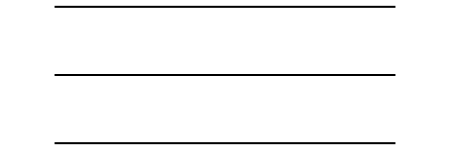

In [42]:
Chem.MolFromSmiles('C#C')   

In [40]:
def unstar(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol2 = AllChem.ReplaceSubstructs(mol, Chem.MolFromSmiles('*'), Chem.MolFromSmiles('[H]'), True)[0]
    mol3 = Chem.RemoveHs(mol2)

    return Chem.MolToSmiles(mol3)


unstar('c1ccc2oc([*:1])nc2c1')

[21:35:50] WARNING: not removing hydrogen atom without neighbors


'c1ccc2ocnc2c1'